In [7]:
# see https://www.beerfestboots.com/fuck-the-dealer-rules
# see https://en.wikipedia.org/wiki/Monte_Carlo_algorithm
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [9]:
def multimode(x):
    if len(x) == 0:
        return []
    mx = max(x)
    return list(filter(lambda i: x[i] == mx, range(len(x))))

# return a pivot, a high, and a low
def get_player_move(remain):
    # guess the median for the pivot
    cc = []
    for i,r in enumerate(remain):
        if r != 0:
            cc += [i]*r
    p = sorted(cc)[len(cc)//2]
    
    # guess a mode for the final guesses
    cl = multimode(remain[0:p])
    ch = [x+p+1 for x in multimode(remain[p+1:])]
    if len(cl) == 0:
        cl = [None]
    if len(ch) == 0:
        ch = [None]
    #print(cl, ch)
    
    return p, random.choice(cl), random.choice(ch)

In [11]:
NUM_PLAYERS = 15

def simulate():
    deck = []
    for suits in range(4):
        for cards in range(13):
            # suits don't matter
            deck.append(cards)
    random.shuffle(deck)

    # initial
    dealer_num = 0
    dealer_count = 0
    player_num = 1

    remain = [4]*13
    drinks = [0]*NUM_PLAYERS

    last_correct = 0

    while len(deck) != 0:
        mc = deck.pop()

        # player strategy in that function
        p,l,h = get_player_move(remain)
        pg = l if mc < p else h
        if mc == p:
            drinks[dealer_num] += 4
            last_correct = 0
        elif mc == pg:
            # lower
            drinks[dealer_num] += 2
            last_correct = 0
        else:
            # miss
            drinks[player_num] += abs(pg - mc)
            last_correct += 1

        if last_correct == 3:
            # dealer advance
            dealer_num += 1
            dealer_num %= NUM_PLAYERS
            last_correct = 0
            dealer_count += 1

        # advance player
        player_num += 1
        if player_num == dealer_num:
            player_num += 1
        player_num %= NUM_PLAYERS

        # 
        remain[mc] -= 1
    
    return drinks, dealer_num, dealer_count

simulate()

([3, 9, 3, 15, 14, 53, 8, 5, 4, 2, 5, 11, 1, 4, 4], 5, 5)

In [13]:
SIM_COUNT = 1000
adn = []
add = np.array([0]*NUM_PLAYERS)
dc = np.array([0]*NUM_PLAYERS)
for i in range(SIM_COUNT):
    drinks, dealer_num, dealer_count = simulate()
    adn.append(dealer_count)
    add[dealer_num] += 1
    dc += drinks
add //= (SIM_COUNT//400)
dc //= SIM_COUNT

6.061

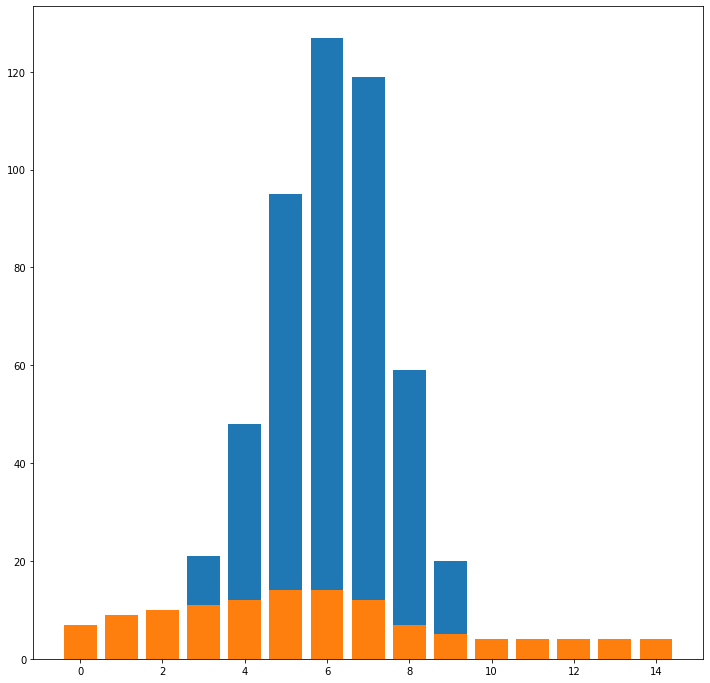

In [15]:
figsize(12,12)
plt.bar(range(len(add)), add)
plt.bar(range(len(dc)), dc)
np.mean(adn)